# Ford GoBike System Data Exploration
## by Noha Ihab

## Preliminary Wrangling

This data set includes information about individual rides made through Ford GoBike, a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('bikes.csv')

In [3]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df[['start_time','end_time']]=df[['start_time','end_time']].apply(pd.to_datetime)

In [6]:
df['start_day']=df.start_time.dt.day
df['start_month']=df.start_time.dt.month


In [7]:
df['start_timing']=df.start_time.dt.time

In [8]:
df['start_day']=df.start_time.dt.day_name()

In [9]:
df['start_hour']=df.start_time.dt.hour

In [10]:
df.drop(columns=['member_birth_year','member_gender'],axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(183215, 18)

In [13]:
df['start_station_id']=df['start_station_id'].astype(int)
df['end_station_id']=df['end_station_id'].astype(int)


In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day,start_month,start_timing,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No,Thursday,2,17:32:10.145000,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No,Thursday,2,18:53:21.789000,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No,Thursday,2,12:13:13.218000,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No,Thursday,2,17:54:26.010000,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes,Thursday,2,23:54:18.549000,23


### What is the structure of your dataset?

The data after cleaning consists of 183215 rows by 17 features.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring what affects the duration of a bike trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the hour, day, and month features will help in the investigation because riding a bike is usually affected by work hours, weekdays/weekends, and the weather that is affected by the month, In addition to the type of the user, I expect subscribers to use the service more often.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Let's start with exploring the duration of bike trips

In [15]:
df['duration_sec'].describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

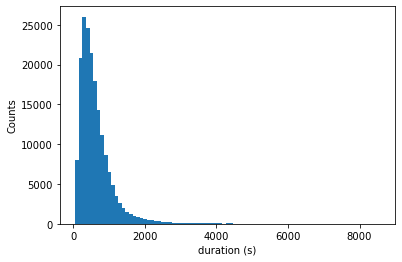

In [16]:
bins=np.arange(60,8544+100,100)
plt.xlabel('duration (s)')
plt.ylabel('Counts')
plt.hist(df['duration_sec'],bins=bins);

It appears that we have extreme values, let's ignore those and zoom in to see the general distribution more clearly.
It also seems to be a log relationship so we shall transform the duration.

In [17]:
np.log10(61),np.log10(85444)

(1.7853298350107671, 4.931681571347222)

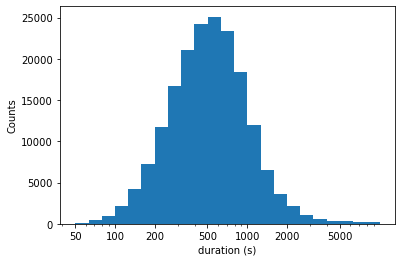

In [18]:
bins = 10 ** np.arange(1.7, 4+0.1, 0.1)
plt.hist(df['duration_sec'],bins=bins)
plt.xscale('log')
plt.xlabel('duration (s)')
plt.ylabel('Counts')
ticks=[50,100,200,500,1000,2000,5000]
labels=['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

In [19]:
Q1=df['duration_sec'].quantile(0.25)
Q3=df['duration_sec'].quantile(0.75)
IQR=Q3-Q1
IQR

471.0

In [20]:
df2=df[~((df['duration_sec']<Q1-1.5*IQR) |(df['duration_sec']>Q3+1.5*IQR))]

In [21]:
df2['duration_sec'].describe()

count    173117.000000
mean        553.719727
std         306.683035
min          61.000000
25%         316.000000
50%         491.000000
75%         735.000000
max        1502.000000
Name: duration_sec, dtype: float64

In [22]:
df=df2

The duration appears to be unimodal with the most common duration being around 500 seconds, it follows a sort of normal distribution. Next, let's explore the days of the week on which people ride.

In [23]:
df['start_day'].describe()

count       173117
unique           7
top       Thursday
freq         33637
Name: start_day, dtype: object

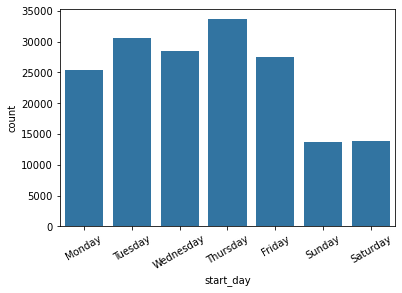

In [24]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_day', color=base_color,
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday'])
plt.xticks(rotation=30);

We can see that Thursday is the most common day for cycling. however, the relative differences aren't very clear. Let's visualize the relative frequency instead.

In [25]:
day_counts=df['start_day'].value_counts()
day_order=day_counts.index
n_days=day_counts.sum()
max_day_count=day_counts[0]
max_prop=max_day_count / n_days
max_prop

0.1943021193759134

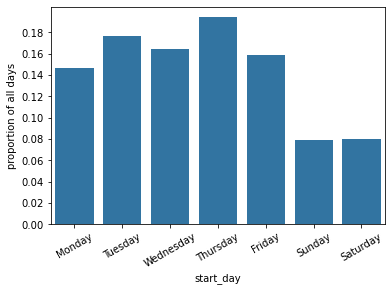

In [26]:
ticks = np.arange(0, max_prop, 0.02)
labels = ['{:0.2f}'.format(v) for v in ticks]
sb.countplot(data=df, x='start_day', color=base_color,
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday'])
plt.xticks(rotation=30)
plt.yticks(ticks * n_days, labels)
plt.ylabel('proportion of all days');

We can now see what proportion each day is. So It's true that Thursday is the most preferred day for using the bike serivce, but it takes up about 19% of the week, followed closely by Tuesday, Wednesday, Friday, and Monday.
The obvious insight here is that people are least likely to cycle on Sunday and Saturday as we can see from the clear drop in the bar height. That makes sense because Sunday and Saturday are weekend days, on which people relax.

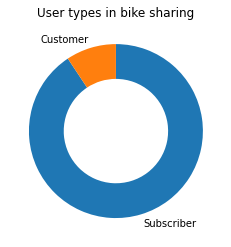

In [27]:
sorted_usertype=df['user_type'].value_counts()
plt.pie(sorted_usertype, labels=sorted_usertype.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4})
plt.title('User types in bike sharing');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I performed logarithmic scale on the duration, because it appeared to be a log scale (long tail) 
Most of the people using the service are subscribers with much fewer customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
There are extremely large durations in the duration_sec column. In my visualization of it, I limited the duration range to be able to look at the distribution. Consequently, I removed the points considered to be outleirs.

As for the day feature, I reordered it by most frequent to make the plot easier to interpret.

## Bivariate Exploration

To dive deeper into our feature of interest, let's see how different times relates to duration.

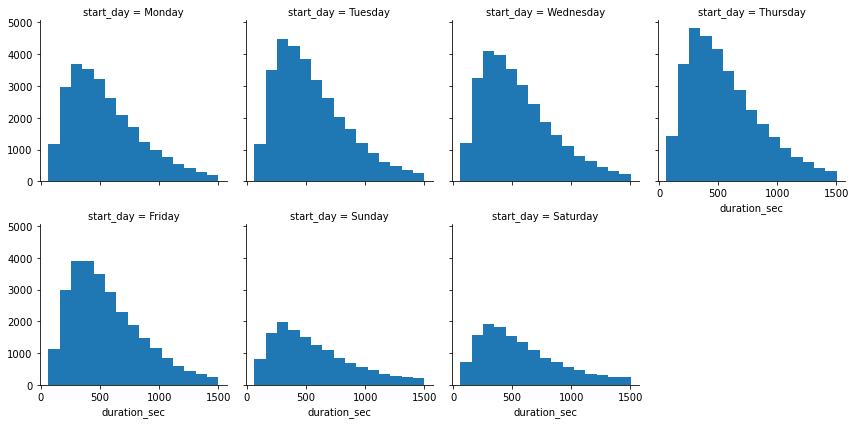

In [28]:
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap=4,
                 col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday'])

g.map(plt.hist, 'duration_sec', bins=15);

The faceted histogram shows that cycling durations are generally right skewed. They are similar on weekdays, and short rides are less frequent on weekends.

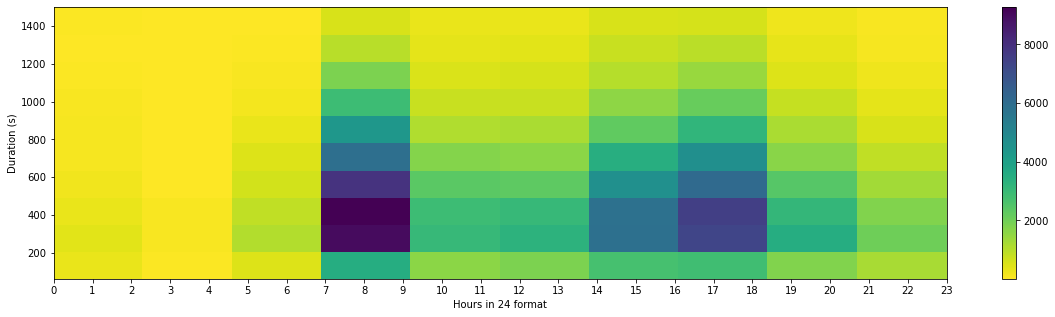

In [29]:
plt.figure(figsize=(20,5))
plt.hist2d(data = df, x = 'start_hour', y = 'duration_sec', cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.xlabel('Hours in 24 format')
plt.ylabel('Duration (s)')
plt.xticks([v for v in range(0,24)]);

The heatmap shows that the most common ride by users is at 8 am with a duration of 400 seconds, and 5 in the evening with the same duration.

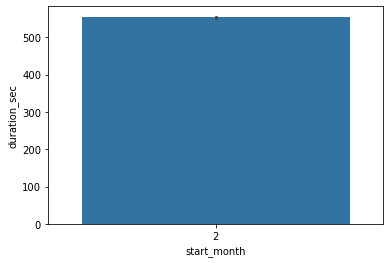

In [30]:
sb.barplot(data=df, x='start_month', y='duration_sec');

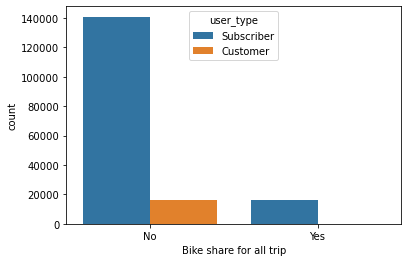

In [31]:
sb.countplot(data = df, x = 'bike_share_for_all_trip', hue = 'user_type')
plt.xlabel('Bike share for all trip');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The duration of rides is right-skewed through all days of the week, with around 400 second duration being the most common on all days. Short duration rides are less common on weekends than on weekdays.

When looking at the time instead, we find that users tend to ride more often in the early morning and the late afternoon than the rest of the day, and rarely ever from midnight to sunrise.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the start_month has only one constant value of 2. That means all the data was collected in the month of February. Therefore, we won't be able to see any variation of duration with the seasons for example.

From the last visualization, we observe that Customers never bike share for all trip, maybe that service is not available for them.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

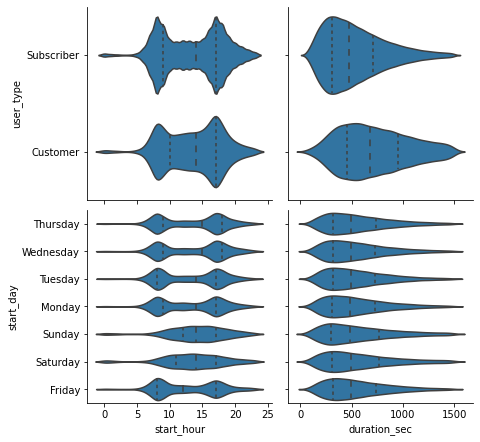

In [32]:
g = sb.PairGrid(data = df, x_vars = ['start_hour', 'duration_sec'],
                y_vars = ['user_type','start_day'], height=3)
g.map(sb.violinplot, inner = 'quartile');

The violin plot conveys a lot of information we didn't come across before. Subscribers' duration of cycling tends to be short, wheras for customers the duration is more distributed.
Both Customers and subscribers begin cycling more often around 6 am and 5 pm.
The start hour for cycling on weekends is distributed throughout the day, in contrary to weekdays where users start cycling more in the early morning and late afternoon.'
It's not very obvious here, but we can see the distribution of duration being more towards long rides on Sunday and Saturday.

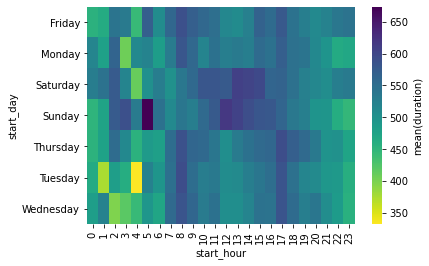

In [33]:
cat_means = df.groupby(['start_day', 'start_hour']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_average')
cat_means = cat_means.pivot(index = 'start_day', columns = 'start_hour',
                            values = 'duration_average')
sb.heatmap(cat_means, cbar_kws = {'label' : 'mean(duration)'}, cmap='viridis_r');

From this heatmap it is shown that the highest average duration of a ride by users is on Sundays around 5 am, and the least duration being on Tuesdays at 4 am.
Generally, users ride for longer durations at 8 am and 5 pm, except on weekends they cycle longer from noon until the afternoon.

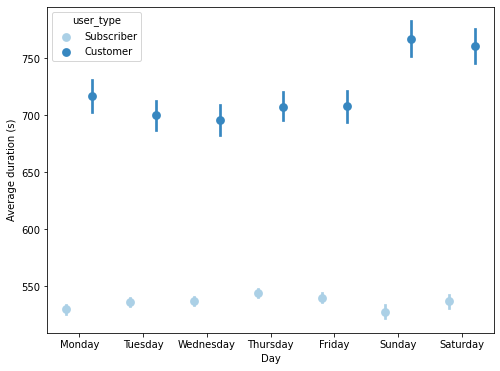

In [34]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4,
                  order=['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday','Saturday'])
plt.ylabel('Average duration (s)')
plt.xlabel('Day');

Users of type Customers have a higher average duration than Subscribers.
Customers use the bike service for longer durations on weekends than weekdays, while Subscribers have a more consistent average ride duration all throughout the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The duration of rides appears to be somewhat consistent for users that are subscribers.

The duration of rides by users was strengthened by the user type, and influenced by the day of the week when it comes to users of Customer type.

### Were there any interesting or surprising interactions between features?

I found it very interesting that the average duration is highest on Sunday in the early morning.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!